## Setup

In [6]:
home <- "/home/workspace/"
path <- "pbmc_flow/data/NDMM PM1 data - Statistics (1).csv"
util <- "pbmc_flow/utils.R"
long_util <- "pbmc_flow/notebooks/flu_response_longitudinal/clr_data/longitudinal_clr_utils.R"

source(file.path(home, util))
source(file.path(home, long_util))

plot_path <- file.path(home, "pbmc_flow/plots/flu_response/longitudinal_composition/clr_data/myeloid")
dir.create(plot_path, recursive = TRUE, showWarnings = FALSE)

df <- read.csv(file.path(home, path))

df <- process_data(
    df,
    subject_col  = "Subject",
    visit_col = "Visit",
    population_col = "population",
    percent_of_col = "percentOf",
    percent_col = "percent",
    plate_col = "plate",
    celltypes = unique(df$population),
    viable_filter = "Total Viable cells"
)

df <- freq_clr(
    df,
    sample_col = "Sample_ID",
    freq_col = "frequency",
    celltype_col = "population"
)

# write.csv(df, "/home/workspace/pbmc_flow/data/myeloid_longitudinal_composition_clr_results.csv", row.names = FALSE)

timepoint_labels <- c(
    "Flu Year 1 Stand-Alone" = "Y1 SA",
    "Flu Year 1 Day 0" = "Y1 Day 0", 
    "Flu Year 1 Day 7" = "Y1 Day 7",
    "Flu Year 1 Day 90" = "Y1 Day 90",
    "Flu Year 2 Stand-Alone" = "Y2 SA",
    "Flu Year 2 Day 0" = "Y2 Day 0",
    "Flu Year 2 Day 7" = "Y2 Day 7", 
    "Flu Year 2 Day 90" = "Y2 Day 90"
)

## Data QC

### Unusual timepoint labels

In [7]:
data <- read.csv(file.path(home, path))
unique_visits <- unique(data$Visit)
visits_not_in_labels <- unique_visits[!unique_visits %in% names(timepoint_labels)]
print(visits_not_in_labels)

[1] "Flu Year 1 Day 7 MM Post Transplant 90 Days"        
[2] "Flu Year 2 Day 90 MM Post Transplant 2 year"        
[3] "Flu Year 2 Stand-Alone N/A - stand-alone collection"
[4] "Flu Year 1 Day 90 MM Post Transplant 1 year"        
[5] "Flu Year 2 Day 90 MM Post Transplant 1 year"        
[6] "Flu Year 1 Stand-Alone MM Post Transplant 90 Days"  


### Sample Availability by Subject and Timepoint

In [8]:
availability_plot <- plot_sample_availability(
    df = df, 
    timepoint_labels = timepoint_labels,
    plot_width = 10,
    plot_height = 10
)

print(availability_plot)

ERROR: Error in eval(predvars, data, env): object 'visit' not found


### All Subject-Visit-Celltype combinations with duplicates

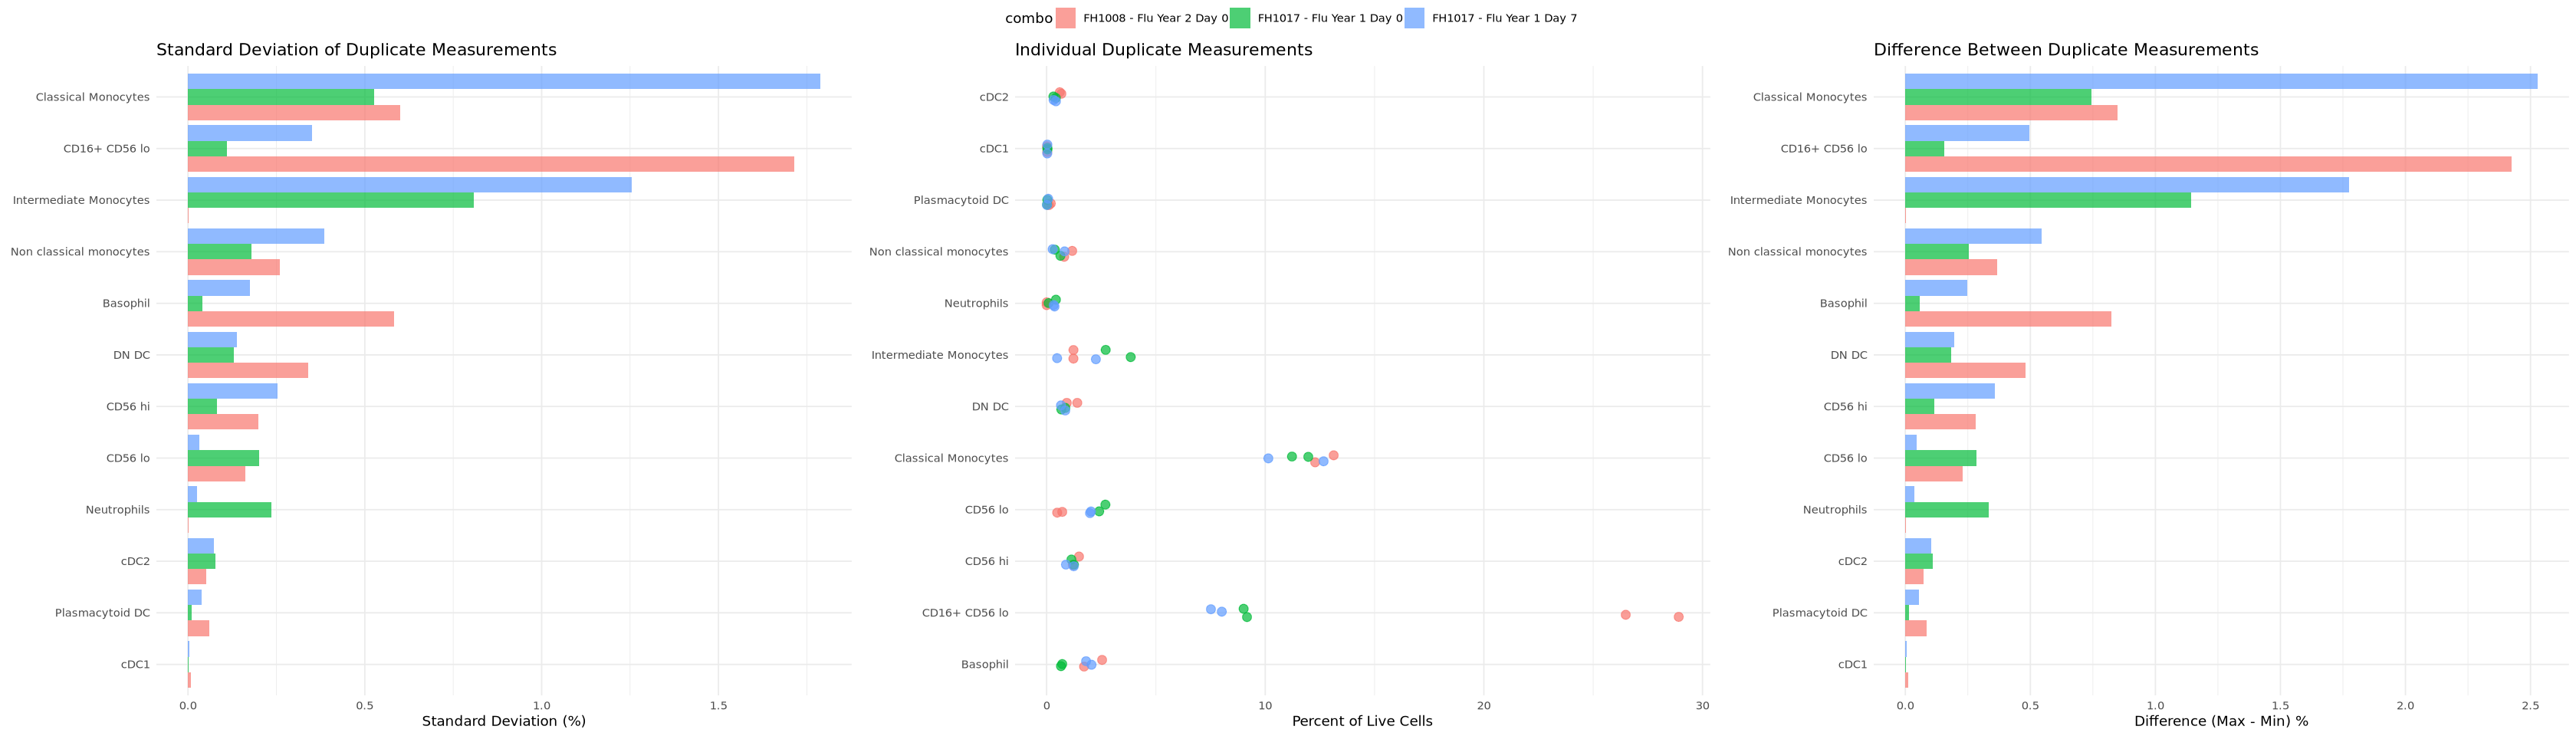

In [4]:
duplicate_analysis <- plot_duplicate_analysis(
    df = df,
    plot_width = 28,
    plot_height = 8
)

print(duplicate_analysis$combined_plot)

## Plotting

In [1]:
timepoints_pairs <- list(
    Y1 = list(c('Y1 SA','Y1 Day 0'), c('Y1 Day 0','Y1 Day 7'), c('Y1 Day 7', 'Y1 Day 90')),
    Y2 = list(c('Y2 SA','Y2 Day 0'), c('Y2 Day 0','Y2 Day 7'), c('Y2 Day 7', 'Y2 Day 90'))
)

plots <- create_longitudinal_cell_plots_clr(
  clr_data = df,
  celltypes = unique(df$population),
  timepoint_labels = timepoint_labels,
  timepoints_pairs = timepoints_pairs,
  population_col = "population",
  show_pval = "all",
  ncol = 6,
  plot_path = plot_path,
  filename_prefix = "myeloid_longitudinal_composition",
  save_width = 24,
  save_height = 16
)

print(plots)

ERROR: Error in create_longitudinal_cell_plots_clr(clr_data = df, celltypes = unique(df$population), : could not find function "create_longitudinal_cell_plots_clr"
